In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Load the data

In [6]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [7]:
y.shape, tx.shape

((10000,), (10000, 2))

# Logistic Regression

https://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf

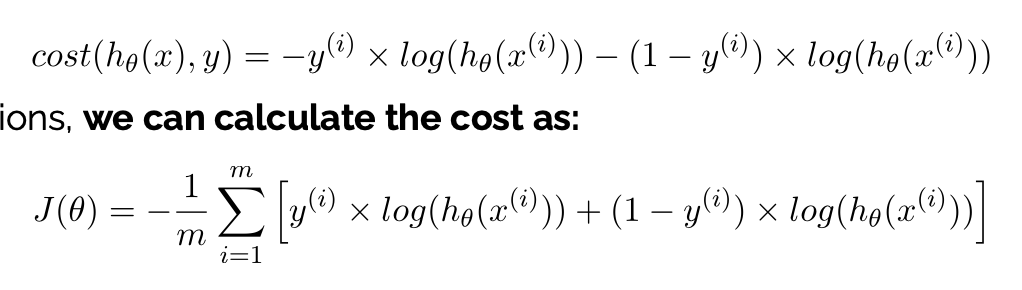

In [9]:
def lr_loss(y, y_pred):
    pass

def theta(x: np.ndarray) -> np.ndarray:
    return 1 / (1+np.exp(-x))   

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """
    
    """
    w = initial_w
    y_pred = theta(tx @ w)


In [21]:
tx.shape

(10000, 2)

In [18]:
w = np.array([1, 1])
y_pred = theta(tx @ w)

1/y.shape[0] * ((y.T @ np.log(y_pred)) + (1 - y).T @ np.log(y_pred)) 

-0.40708783935114334

#### supposedly two negative log likelihoods

In [24]:
def compute_loss_logistic(y, tx, w):
    """Compute the cost by negative log likelihood.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        w: weights used to calculate loss
    
    Returns:
        logistic loss
    """
    
    y = y.reshape((-1, 1))
    return np.sum(np.logaddexp(0, tx.dot(w))) - y.T.dot(tx.dot(w))

In [38]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

def compute_logistic_regression_loss(y, tx, w): 
    """
    """
    N = len(y)
    term_1 = y.T @ np.log(sigmoid(tx @ w))
    term_2 = (1 - y).T @ np.log(1 - sigmoid(tx @ w))
    
    return 1/N * (-1) * (term_1 + term_2)

In [29]:
y[0] * np.log(sigmoid(tx[0] @ w))

-5.635086198035972

In [ ]:
xw = tx @ w
ce = []
for y_t, xw_t in zip(y, xw):
    ce.append()

In [33]:
y.T @ np.log(sigmoid(tx @ w))

-258752.52589649818

In [34]:
compute_loss_logistic(y, tx, w) * 1/len(y)

array([-85.3665466])

In [37]:
compute_logistic_regression_loss(y, tx, w)

-85.36654659774337

In [83]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """Logistic regression with loss minimized using gradient descent

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        lambda_: penalty factor
        initial_w: initial weight vector
        max_iters: number of iterations
        gamma: step size

    Returns:
        w: minimized weight vector
        loss: corresponding loss
    """
    w = initial_w
    losses = []
    for _ in range(max_iters):
        gradient = compute_gradient_logistic(y, tx, w)
        loss = compute_loss_logistic(y, tx, w)
        losses.append(loss)
        w = w - gamma * gradient
    return w, losses

def compute_loss_logistic(y, tx, w):
    """Compute the cost by negative log likelihood.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        w: weights used to calculate loss
    
    Returns:
        logistic loss
    """
    
    y = y.reshape((-1, 1))
    return np.sum(np.logaddexp(0, tx.dot(w))) - y.T.dot(tx.dot(w))

def compute_gradient_logistic(y, tx, w):
    """Compute the gradient of loss for logistic regression.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        w: weights
        
    Returns:
        :return: logistic gradient
    """
    
    return tx.T.dot(sigmoid(tx.dot(w))-y)

def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """Regularized logistic regression using SGD.

    Args:
        y: outpus/labels
        tx: standardized inputs/features augmented with the first column filled with 1's
        lambda_: penalty factor
        initial_w: initial weight vector
        max_iters: number of iterations
        gamma: step size

    Returns:
        w: minimized weight vector
        loss: corresponding loss
    """
    w = initial_w
    losses = []
    for _ in range(max_iters):
        # gamma = 1/(n_iter+1) not sure? Gamma is passed as constant in the project description
        for y_b, tx_b in batch_iter(y, tx, batch_size=len(y), num_batches=1):
            gradient = compute_gradient_logistic(y_b, tx_b, w) + 2 * lambda_ * w
            loss = compute_loss_logistic(y_b, tx_b, w) + lambda_ * np.squeeze(w.T.dot(w))
            losses.append(loss)
            w = w - gamma * gradient
    return w, losses

In [81]:
w, losses = logistic_regression(y, tx, np.array([0, 1]), 100, 0.05)
losses

[array([-126722.25372239]),
 array([-2.72074276e+10]),
 array([-5.42479966e+10]),
 array([-8.12885656e+10]),
 array([-1.08329135e+11]),
 array([-1.35369704e+11]),
 array([-1.62410273e+11]),
 array([-1.89450842e+11]),
 array([-2.16491411e+11]),
 array([-2.4353198e+11]),
 array([-2.70572549e+11]),
 array([-2.97613118e+11]),
 array([-3.24653687e+11]),
 array([-3.51694256e+11]),
 array([-3.78734825e+11]),
 array([-4.05775394e+11]),
 array([-4.32815963e+11]),
 array([-4.59856532e+11]),
 array([-4.86897101e+11]),
 array([-5.1393767e+11]),
 array([-5.40978239e+11]),
 array([-5.68018808e+11]),
 array([-5.95059377e+11]),
 array([-6.22099946e+11]),
 array([-6.49140515e+11]),
 array([-6.76181084e+11]),
 array([-7.03221653e+11]),
 array([-7.30262222e+11]),
 array([-7.57302791e+11]),
 array([-7.8434336e+11]),
 array([-8.11383929e+11]),
 array([-8.38424498e+11]),
 array([-8.65465067e+11]),
 array([-8.92505636e+11]),
 array([-9.19546206e+11]),
 array([-9.46586775e+11]),
 array([-9.73627344e+11]),
 ar

In [82]:
w, losses = reg_logistic_regression(y, tx, 0, np.array([0, 1]), 100, 0.05)
losses

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y: np.array, tx: np.array, w: np.array) -> int:
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = y.shape[0]

    e = y - tx @ w
    loss = 1/(2*N) * e.T @ e
    return loss

In [5]:
w = np.array([0, 1])
compute_loss(y, tx, w)

2779.2570003241835

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    losses = np.zeros((len(grid_w0), len(grid_w1)))

    for enum0, w0 in enumerate(grid_w0):
        for enum1, w1 in enumerate(grid_w1):
            losses[enum0, enum1] = compute_loss(y, tx, np.array([w0, w1]))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678242, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.416 seconds


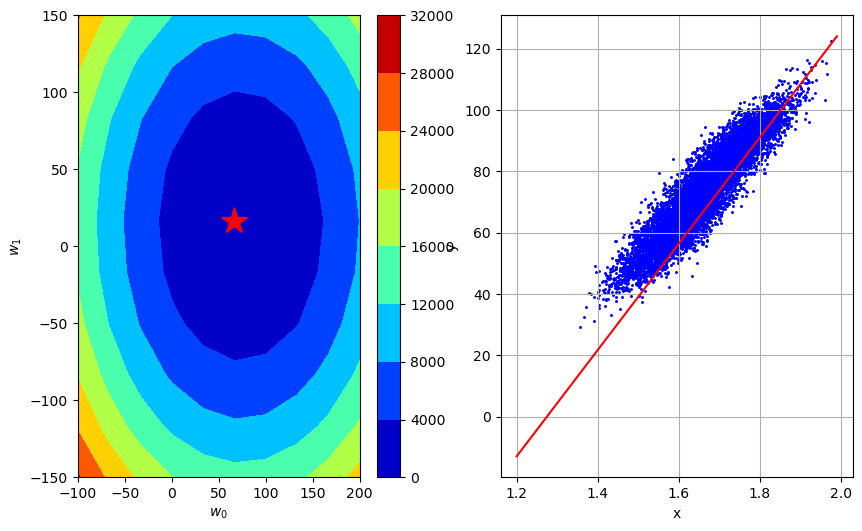

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient_from_def(y, tx, w, delta=0.00000001):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    grad = np.zeros(len(w))
    loss = compute_loss(y, tx, w)
    for enum, _ in enumerate(w):
        w_temp = w.copy()
        w_temp[enum] += delta
        loss_delta_wn = compute_loss(y, tx, w_temp)
        grad[enum] = (loss_delta_wn - loss) / delta
    return grad

In [9]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = y.shape[0]

    e = y - tx @ w
    grad = -1/N * tx.T @ e
    return grad


In [10]:
w = np.array([grid_w0[0], grid_w1[0]])
print(f"Gradient by definition: {compute_gradient_from_def(y, tx, w)}")
print(f"Gradient from derivative of the operation: {compute_gradient(y, tx, w)}")

Gradient by definition: [-173.29221009 -163.4889486 ]
Gradient from derivative of the operation: [-173.293922   -163.47971243]


In [11]:
%timeit compute_gradient_from_def(y, tx, w)

%timeit compute_gradient(y, tx, w)

The slowest run took 4.14 times longer than the fastest. This could mean that an intermediate result is being cached.
1.7 ms ± 812 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.1 ms ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Please fill in the functions `gradient_descent` below:

In [12]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, ws[-1])
        w = ws[-1] - gamma * grad # E[grad(L_n(w))] = grad(L(w)) so we approx
        loss = compute_loss(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [17]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.05

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2521.4937573323596, w0=3.6646961001052567, w1=0.6739856217494397
GD iter. 1/49: loss=2277.1482400596706, w0=7.146157395205247, w1=1.314271962411421
GD iter. 2/49: loss=2056.626410721061, w0=10.453545625550232, w1=1.9225439860403097
GD iter. 3/49: loss=1857.6054597429677, w0=13.595564444377974, w1=2.5004024084877416
GD iter. 4/49: loss=1677.989051485238, w0=16.58048232226432, w1=3.049367909812803
GD iter. 5/49: loss=1515.885243032641, w0=19.416154306256352, w1=3.5708851360716127
GD iter. 6/49: loss=1369.5865559041672, w0=22.110042691048797, w1=4.066326501017484
GD iter. 7/49: loss=1237.5519907707219, w0=24.66923665660162, w1=4.536995797716057
GD iter. 8/49: loss=1118.3907957377883, w0=27.1004709238768, w1=4.9841316295797045
GD iter. 9/49: loss=1010.8478172205652, w0=29.410143477788218, w1=5.40891066985016
GD iter. 10/49: loss=913.7902791087719, w0=31.604332404004065, w1=5.8124507581071025
GD iter. 11/49: loss=826.1958509628787, w0=33.68881188390912, w1=6.195813841951

In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [79]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    N = y.shape[0]
    # N_stoch_idx = N // 100
    # N_stoch_idx = 1
    # stoch_idx = np.random.choice(np.arange(N), N_stoch_idx)

    # y_temp = y[stoch_idx]
    # tx_temp = tx[stoch_idx]
    
    e = y - tx @ w

    grad = - 1/N * tx.T @ e
    return grad


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    n_batches = tx.shape[0] // batch_size
    for n_iter in range(max_iters):
        grad = 0 
        for batch_y, batch_tx in batch_iter(y, tx, batch_size, n_batches):
            grad += compute_stoch_gradient(batch_y, batch_tx, w)
        grad = grad / n_batches
        w = w - gamma * grad # E[grad(L_n(w))] = grad(L(w)) so we approx
        loss = compute_loss(y, tx, w)
            # store w and loss
        ws.append(w)
        losses.append(loss)
        
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [80]:
stoch_grad = compute_stoch_gradient(y, tx, w)
grad = compute_gradient(y, tx, w)

print(f"Gradient: {grad} \nStochastic grad: {stoch_grad}")

Gradient: [-174.06780585 -161.03489487] 
Stochastic grad: [-174.06780585 -161.03489487]


In [81]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.05
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2596.454437053611, w0=3.7033902927463185, w1=0.5517447432994593
SGD iter. 1/49: loss=2349.728375625888, w0=7.221611070855323, w1=1.0759022494339456
SGD iter. 2/49: loss=2127.058105187368, w0=10.563920810058875, w1=1.5738518802617072
SGD iter. 3/49: loss=1926.0981861166028, w0=13.73911506230225, w1=2.0469040295480805
SGD iter. 4/49: loss=1744.7318591552378, w0=16.75554960193346, w1=2.496303571370135
SGD iter. 5/49: loss=1581.048749072605, w0=19.621162414583104, w1=2.9232331361010866
SGD iter. 6/49: loss=1433.324742223031, w0=22.343494586600265, w1=3.3288162225954907
SGD iter. 7/49: loss=1300.0038260412891, w0=24.929710150016568, w1=3.7141201547651748
SGD iter. 8/49: loss=1179.6816991872677, w0=27.386614935262056, w1=4.080158890326374
SGD iter. 9/49: loss=1071.0909797015127, w0=29.720674481245272, w1=4.427895689109514
SGD iter. 10/49: loss=973.0878553656189, w0=31.93803104992933, w1=4.758245647953496
SGD iter. 11/49: loss=884.6400356524744, w0=34.04451979017918, w1=5

In [82]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [23]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [24]:
y.shape, tx.shape

((202,), (202, 2))

In [25]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=318.28212470159616, w0=51.847464098448434, w1=7.724426406192428
GD iter. 1/49: loss=88.6423556165127, w0=67.40170332798299, w1=10.041754328050118
GD iter. 2/49: loss=67.97477639885521, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=66.11469426926604, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=65.94728687760302, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.93222021235333, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93086421248086, w0=74.0516072257859, w1=11.032481534481912
GD iter. 7/49: loss=65.93074217249236, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93073118889338, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073020036948, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073011140233, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073010339528, w0=74.06776649225755, w1=11.03488900159354
GD it

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [40]:
def test():
    print(tx.shape)
    e = y - tx @ w
    print(e.shape)
    sign = np.sign(e)
    print(sign.shape)
    s = tx.T @ sign 
    print(s.shape)


test()

(202, 2)
(202,)
(202,)
(2,)


In [44]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    N = y.shape[0]
    e = y - tx @ w

    grad = (-1/N) * tx.T @ np.sign(e)
    return grad

In [47]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_subgradient_mae(y, tx, w)
        w = w - gamma * grad
        loss = compute_loss(y, tx, w)

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [48]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2818.232650437405, w0=0.7000000000000004, w1=7.237266341775239e-16
SubGD iter. 1/499: loss=2767.120186338955, w0=1.4000000000000008, w1=1.4474532683550478e-15
SubGD iter. 2/499: loss=2716.497722240508, w0=2.1000000000000014, w1=2.1711799025325716e-15
SubGD iter. 3/499: loss=2666.36525814206, w0=2.8000000000000016, w1=2.8949065367100956e-15
SubGD iter. 4/499: loss=2616.7227940436105, w0=3.5000000000000018, w1=3.6186331708876196e-15
SubGD iter. 5/499: loss=2567.5703299451616, w0=4.200000000000002, w1=4.342359805065143e-15
SubGD iter. 6/499: loss=2518.9078658467142, w0=4.900000000000002, w1=5.066086439242667e-15
SubGD iter. 7/499: loss=2470.735401748265, w0=5.600000000000002, w1=5.7898130734201904e-15
SubGD iter. 8/499: loss=2423.0529376498166, w0=6.3000000000000025, w1=6.513539707597714e-15
SubGD iter. 9/499: loss=2375.8604735513677, w0=7.000000000000003, w1=7.237266341775238e-15
SubGD iter. 10/499: loss=2329.1580094529204, w0=7.700000000000003, w1=7.9609929759527

In [49]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [72]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    n_batches = tx.shape[0] // batch_size
    for n_iter in range(max_iters):
        mini_batch_iter = batch_iter(y, tx, batch_size, n_batches)
        grad = 0
        for batch_y, batch_tx in mini_batch_iter:
            grad += compute_subgradient_mae(batch_y, batch_tx, w)
        grad = grad / n_batches
        w = w - gamma * grad
        loss = compute_loss(batch_y, batch_tx, w)

        ws.append(w)
        losses.append(loss)
        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [73]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=2643.4267891771137, w0=0.7, w1=7.883133090197336e-16
SubSGD iter. 1/499: loss=4140.053224271632, w0=1.4, w1=1.5839365023105141e-15
SubSGD iter. 2/499: loss=2692.2378855893007, w0=2.0999999999999996, w1=2.3730192728324632e-15
SubSGD iter. 3/499: loss=1968.5735154918516, w0=2.8, w1=3.1805691194075833e-15
SubSGD iter. 4/499: loss=1876.295628254364, w0=3.5, w1=3.941566545098668e-15
SubSGD iter. 5/499: loss=3672.4762061502533, w0=4.2, w1=4.7383439306427714e-15
SubSGD iter. 6/499: loss=1226.3895030246758, w0=4.9, w1=5.543200661960138e-15
SubSGD iter. 7/499: loss=3567.4445216556514, w0=5.6000000000000005, w1=6.345749008770857e-15
SubSGD iter. 8/499: loss=1338.518874799424, w0=6.300000000000001, w1=7.142911125066069e-15
SubSGD iter. 9/499: loss=5183.9140104733415, w0=7.000000000000001, w1=7.932378626339125e-15
SubSGD iter. 10/499: loss=1291.5238895948046, w0=7.700000000000001, w1=8.726462896625474e-15
SubSGD iter. 11/499: loss=1133.7073663991046, w0=8.4, w1=9.515160936

In [74]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>